## Machine Learning

### Supervised learning algorithms:

Presense of training data with predictors (features) and correct answer (labels).
Model uses training data to learn the relationship between features and labels.

#### Regression: 

Predict a Continuous number 

    Simple Linear Regression
    Multiple Linear Regression
    Polynomial Regression
    SVR
    Decision Tree Regression
    Random Forest
    
    
#### Classification: 

Predict a category. 

    Logistic Regression
    K-Nearest Neighbors (KNN)
    Support Vector Machine (SVM)
    Naive Bayes
    Decision Tree Classification
    Random Forest Classification


### Un-supervised learning algorithms:

Absense of output data. 
Machine tries to group unsorted information based on patterns without any prior training of data.

#### Clustering: 

    Grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.

#### Anomaly detection:

    Identification of items, events or observations which do not conform to an expected pattern or other items in a dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


### Data Preprocessing

Handling Missing Data

    pandas dropna, fillna

Data Cleaning, formatting

Encoding categorical data

    pandas get_dummies
    sklearn LabelEncoder, OneHotEncoder

Splitting the data into Train and Test
    
    sklearn train_test_split

Feature Scaling:
    
    Standardization: (x - mean(x)) / std(x) sklearn StandardScaler
    Normalization: (x - min(x)) / (max(x) - min(x)) sklearn MinMaxScaler

### Regression

In [2]:
df = pd.read_csv('House_data_LR.csv')
df.head()

,Unnamed: 0,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0


In [3]:
df.isnull().any() 

Unnamed: 0     False
sqft_living    False
price          False
dtype: bool

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
X = df.iloc[:, :1].values
X[:5]

y = df.iloc[:, -1].values
y[:5]


array([ 221900.,  538000.,  180000.,  604000.,  510000.])

### Split data into train and test

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Simple Linear Regression

    y = b0 + b1 * x1 
    
    y - dependent variable
    x - independent variable
    b0 - constant
    x1 - coefficient

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

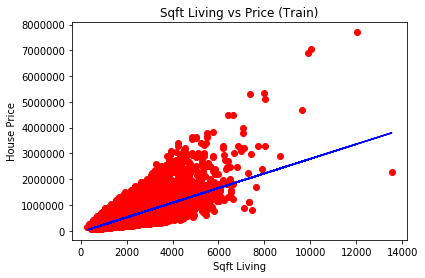

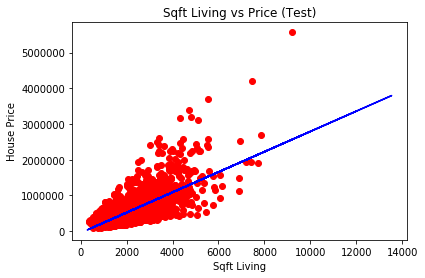

In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict the test set results
y_pred = lr.predict(X_test)

# Training set
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_train, lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price (Train)')
plt.xlabel('Sqft Living')
plt.ylabel('House Price')
plt.show()

# Test set
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_train, lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price (Test)')
plt.xlabel('Sqft Living')
plt.ylabel('House Price')


In [129]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, lr, lr.coef_, lr.intercept_

(248879.06124185037,
 0.47915772372653775,
 0.47913362293174466,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 array([ 283.96855716]),
 -48257.06359102577)

### Multiple Linear Regression

    y = b0 + (b1 * x1) + (b2 * x2) + (b3 * x3)
    
    y - dependent variable
    x1, x2, x3 - independent variables
    b0 - constant
    b1, b2, b3 - coefficients
    

In [140]:
df = pd.read_csv('House_data_MLR.csv')
df.head()

,sqft_living,view,bedrooms,bathrooms,sqft_basement,price
0,1180,0,3,1.00,0,221900.0
1,2570,0,3,2.25,400,538000.0
2,770,0,2,1.00,0,180000.0
3,1960,0,4,3.00,910,604000.0
4,1680,0,3,2.00,0,510000.0


In [143]:
df.isnull().any()
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [142]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X
#y

array([[  1.18000000e+03,   0.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   0.00000000e+00],
       [  2.57000000e+03,   0.00000000e+00,   3.00000000e+00,
          2.25000000e+00,   4.00000000e+02],
       [  7.70000000e+02,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.02000000e+03,   0.00000000e+00,   2.00000000e+00,
          7.50000000e-01,   0.00000000e+00],
       [  1.60000000e+03,   0.00000000e+00,   3.00000000e+00,
          2.50000000e+00,   0.00000000e+00],
       [  1.02000000e+03,   0.00000000e+00,   2.00000000e+00,
          7.50000000e-01,   0.00000000e+00]])

### Encoding categorical columns

    Encode dummy variables if they are of string datatypes
    Use OneHotEncoding to create corresponding columns
    Use only n-1 dummy columns, that is drop one dummy column to avoid dummy variable trap.

Dummy Variable Trap: If both constant term and an exhaustive set of dummies are present, perfect multicollinearity (one predictor variable in a multiple regression model can be linearly predicted from the other, the correlation between two independent variables is equal to 1 or −1) occurs, and the system of equations formed by the regression does not have a unique solution. This is referred to as the dummy variable trap. The trap can be avoided by removing either the constant term or one of the offending dummies. The removed dummy then becomes the base category against which the other categories are compared


https://en.wikipedia.org/wiki/Multicollinearity

https://en.wikipedia.org/wiki/Dummy_variable_(statistics)

In [17]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [144]:
#1. Encode dummy variables if they are of string datatypes

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()  
X[:, 1] = le.fit_transform(X[:, 1])

#2. Use OneHotEncoding to create corresponding columns

onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = np.round(X)

#3. Use only n-1 dummy columns, that is drop one dummy column to avoid dummy variable trap.

# X = X[:, 1:] # We will not use this for sklearn Linear regression as the library takes care of it
X[0]

array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.18000000e+03,
         3.00000000e+00,   1.00000000e+00,   0.00000000e+00])

In [145]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#predict the test set results
y_pred = mlr.predict(X_test)


In [146]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, mlr.coef_, mlr.intercept_

(235364.4511924927,
 0.53418738485615092,
 0.53399332321951276,
 array([ -2.22237443e+05,  -5.53929060e+04,  -1.05988711e+05,
         -2.11699014e+04,   4.04788961e+05,   2.69176765e+02,
         -4.78110015e+04,   3.41184619e+04,  -9.35904880e+00]),
 275964.43773639301)

### Multiple Linear Regression 

Entire Dataset with multiple categorical columns

In [147]:
df = pd.read_csv('House_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


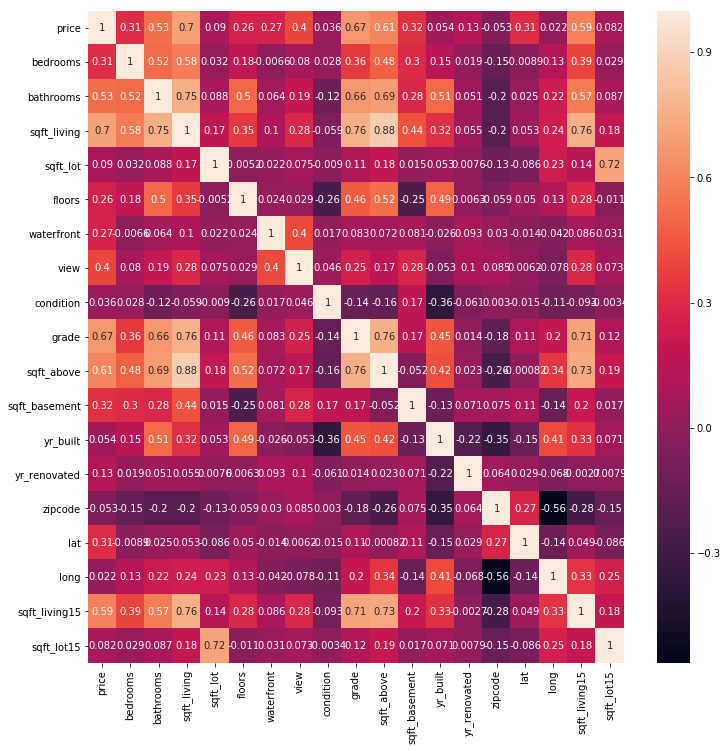

In [153]:
#df.drop(['id', 'date'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.heatmap(df.corr(),annot = True)

#### Data Cleaning

In [166]:
df.isnull().any()
#df['basement'] = (df['sqft_basement'] > 0).astype(int)
#df['renovated'] = (df['yr_renovated'] > 0).astype(int)

to_drop = ['sqft_basement', 'yr_renovated']
#df.drop(to_drop, axis = 1, inplace = True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


#### Handling Categorical Columns

In [174]:
#cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors']

#df = pd.get_dummies(df, columns = cat_cols, drop_first=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,...,grade_9,grade_10,grade_11,grade_12,grade_13,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,1180,5650,1180,1955,98178,47.5112,-122.257,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2170,1951,98125,47.7210,-122.319,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,770,1933,98028,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,1965,98136,47.5208,-122.393,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1680,1987,98074,47.6168,-122.045,...,0,0,0,0,0,0,0,0,0,0


#### Multiple Linear Regression Model

In [25]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#predict the test set results
y_pred = mlr.predict(X_test)


In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2

(178040.31119571882, 0.73345766513310273, 0.73298818294505497)

### K Nearest Neighbors

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

KNN is a algorithm which can be used both for regression and classification problems. KNN is a lazy learning algorithm which means it does not retain any information of what it has learned from the training data but rather keeps the data handy to make predictions.

The algorithm works this way:
1. Store all the feature vectors with there mapping that is the class they were assigned to, let's say 
> $$ X_i -> Y_i $$
2. Take a unknown feature vector which has to be classified say 'u'.
3. Calculate the distance of all the k neighbors where k is user defined which is nothing but a parameter which defined how many neighbors in the dataset around 'u' is to be considered. 
4. The k neighbors are calculated using *Euclidean Distance* which is something like this 
> #### $$ distance = \sqrt{\sum_{i=0}^{n}(x_j - x_i )^ 2} $$ 
5. Once the k neighbors are found find there class and based on population of the k neighbors class assign the most common class to the 'u'.

<img src="knn.png" alt="knn_graph" style="width: 300px;"/>


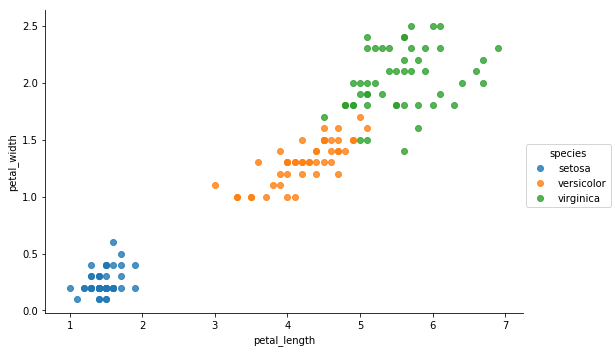

In [27]:
iris = pd.read_csv('iris.csv')
sns.lmplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species', fit_reg = False, aspect=1.5)

In [180]:
df = pd.read_csv('House_data.csv')
df.head()

df.isnull().any()
df['basement'] = (df['sqft_basement'] > 0).astype(int)
df['renovated'] = (df['yr_renovated'] > 0).astype(int)

to_drop = ['id', 'date', 'sqft_basement', 'yr_renovated']
df.drop(to_drop, axis = 1, inplace = True)

cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors']
df = pd.get_dummies(df, columns = cat_cols, drop_first=True)

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred))

164499.1200553531

### Feature Selection

Feature Extraction: 

When performing analysis of complex data one of the major problems stems from the number of variables involved. Analysis with a large number of variables generally requires a large amount of memory and computation power, also it may cause algorithm to overfit to training samples and generalize poorly to new samples. Feature extraction is a general term for methods of constructing combinations of the variables to get around these problems while still describing the data with sufficient accuracy

    Transform two or more features that perform badly in your model due to possible mutual correlation into a single feature that performs more effectively
    PCA (principal component analysis), SVD (singular value decomposition)

Feature Selection:

    Choose features from the original set based on some criteria like Information Gain, Correlation and Mutual Information. 
    
Out of plenty of feature selection methods available **Tree** based and **Correlation** are most usefull.

1. Variance Threshold
2. Select K-best (Chi-2)
3. Recursive Feature Elimination
4. Tree based feature selection

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

http://scikit-learn.org/stable/modules/feature_selection.html

In [182]:
df = pd.read_csv('House_data.csv')
df.isnull().any()
df['basement'] = (df['sqft_basement'] > 0).astype(int)
df['renovated'] = (df['yr_renovated'] > 0).astype(int)
to_drop = ['id', 'date', 'sqft_basement', 'yr_renovated']
df.drop(to_drop, axis = 1, inplace = True)
cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors']
df = pd.get_dummies(df, columns = cat_cols, drop_first=True)

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_
tree.classes_

array([0, 1])

In [183]:
importances = tree_clf.feature_importances_
feature_names = df.iloc[:, 1:].columns.tolist()
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
features

[('lat', 0.1011873231601815),
 ('sqft_lot', 0.096873587230218744),
 ('sqft_lot15', 0.092635272967041812),
 ('long', 0.092304438865483437),
 ('sqft_living15', 0.091617800862930407),
 ('sqft_living', 0.091170633361402686),
 ('sqft_above', 0.089717273149131013),
 ('yr_built', 0.086418877853062598),
 ('zipcode', 0.063895502213917821),
 ('bathrooms', 0.057441294139124209),
 ('bedrooms', 0.045734980973042245),
 ('basement', 0.010621369246429044),
 ('condition_3', 0.010417192365583479),
 ('condition_4', 0.0099611411417544517),
 ('view_2', 0.0076611756476610716),
 ('floors_2.0', 0.0075483089429014012),
 ('renovated', 0.0065080432096673527),
 ('floors_1.5', 0.0064905901657540998),
 ('condition_5', 0.0062421720709515431),
 ('view_3', 0.0039158980847408377),
 ('view_1', 0.0036971312061390496),
 ('view_4', 0.0023388480382549462),
 ('grade_7', 0.0022519300939224194),
 ('condition_2', 0.0017551134269836802),
 ('grade_8', 0.0016732992161834302),
 ('floors_2.5', 0.0015112603351533859),
 ('grade_6', 0.

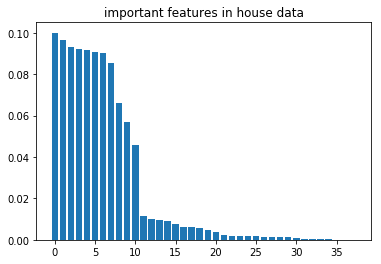

In [31]:
plt.bar(range(len(features)), [imp[1] for imp in features], align='center')
plt.title('important features in house data');

In [189]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(tree_clf, prefit = True)
x_updated = model.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])

Total Features count: 38
Selected Features:  11


In [190]:
y = df.iloc[:, 0].values

#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_updated, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred))

152335.56053853413

### Estimating total Interactions for facebook dataset

In [9]:
# load the facebook dataset
df = pd.read_csv('dataset_Facebook.csv', sep=';')
# print the head of the dataframe
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [10]:
df.isnull().any()

Page total likes                                                       False
Type                                                                   False
Category                                                               False
Post Month                                                             False
Post Weekday                                                           False
Post Hour                                                              False
Paid                                                                    True
Lifetime Post Total Reach                                              False
Lifetime Post Total Impressions                                        False
Lifetime Engaged Users                                                 False
Lifetime Post Consumers                                                False
Lifetime Post Consumptions                                             False
Lifetime Post Impressions by people who have liked your Page           False

In [11]:
df.fillna(df.mean(), inplace = True)
df.isnull().any()

Page total likes                                                       False
Type                                                                   False
Category                                                               False
Post Month                                                             False
Post Weekday                                                           False
Post Hour                                                              False
Paid                                                                   False
Lifetime Post Total Reach                                              False
Lifetime Post Total Impressions                                        False
Lifetime Engaged Users                                                 False
Lifetime Post Consumers                                                False
Lifetime Post Consumptions                                             False
Lifetime Post Impressions by people who have liked your Page           False

### Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
le.classes_

array(['Link', 'Photo', 'Status', 'Video'], dtype=object)

### Feature Selection

In [13]:
# import the classifier
from sklearn.ensemble import ExtraTreesClassifier

# create an instance
tree_clf = ExtraTreesClassifier()

y = df['Total Interactions'].tolist()

# remove target column from the df
df_features = df.drop('Total Interactions', axis=1)

# store features in X array
X = df_features.values

# check top 2 values
X[:2]

tree_clf.fit(X, y)
tree_clf.feature_importances_

array([ 0.05376436,  0.01649468,  0.0249236 ,  0.0491853 ,  0.0525376 ,
        0.05776114,  0.02524732,  0.06134792,  0.05828849,  0.06301793,
        0.06395809,  0.0595537 ,  0.06796846,  0.05709567,  0.06436011,
        0.05781784,  0.09807744,  0.06860036])

Feature ranking:
feature 16 : like (0.098077)
feature 17 : share (0.068600)
feature 12 : Lifetime Post Impressions by people who have liked your Page (0.067968)
feature 14 : Lifetime People who have liked your Page and engaged with your post (0.064360)
feature 10 : Lifetime Post Consumers (0.063958)
feature 9 : Lifetime Engaged Users (0.063018)
feature 7 : Lifetime Post Total Reach (0.061348)
feature 11 : Lifetime Post Consumptions (0.059554)
feature 8 : Lifetime Post Total Impressions (0.058288)
feature 15 : comment (0.057818)
feature 5 : Post Hour (0.057761)
feature 13 : Lifetime Post reach by people who like your Page (0.057096)
feature 0 : Page total likes (0.053764)
feature 4 : Post Weekday (0.052538)
feature 3 : Post Month (0.049185)
feature 6 : Paid (0.025247)
feature 2 : Category (0.024924)
feature 1 : Type (0.016495)


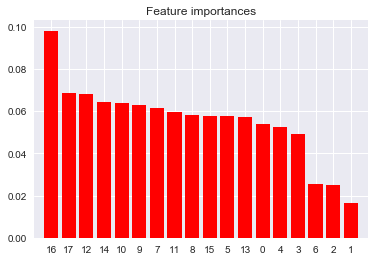

In [14]:
import operator
importances = tree_clf.feature_importances_
feature_names = df_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(tree_clf, prefit=True)
X_updated = model.transform(X)
print('Total features count', np.array(X).shape[1])
print('Selected features', np.array(X_updated).shape[1])

Total features count 18
Selected features 12


### Multiple Linear Regression

In [16]:
important_features = [feature for (feature, score) in sorted_features]

# select the top most important feature and store into X array as input
# selecting 4 features by [:4]
X = df[important_features[:4]].values

# set Total Interactions as target
y = df['Total Interactions'].tolist()
X.shape

(500, 4)

In [19]:
# splitting data
# set the test_size for splitting the total data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# create the model
from sklearn.linear_model import LinearRegression
multi_lr_model = LinearRegression()

# fit the model with X and y

multi_lr_model.fit(X_train, y_train)

X_test = np.array(X_test)

# get predictions
y_pred = multi_lr_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(multi_lr_model.coef_)-1)*(1 - r2)

rmse, r2, adj_r2, multi_lr_model, multi_lr_model.coef_, multi_lr_model.intercept_

(7.592010033888663,
 0.99906281483747228,
 0.99905524162403769,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 array([  1.01994567e+00,   1.29542404e+00,   1.86457066e-05,
          1.47203712e-03]),
 -5.7942814348799345)